#### Problem Statement
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


In [1]:
#import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

### 1. Exploratory Data Analysis

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
df_train =  pd.read_csv(r"C:\Users\PREETI\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv")
df_test = pd.read_csv(r"C:\Users\PREETI\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv")

In [4]:
df_train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [5]:
df_train.sample(10)

id                                       comment_text  \
60577   a22a53c87934032e  N.B. Neil\n\nNeil, please note that your threa...   
73029   c3631c20fbd54850  "\n\nYour implication that any of my contribut...   
24594   40fb75683ec556c1          Garryoak, please review WP:VER and WP:NOR   
109922  4beb4f714a70b770  "\n\n My Little Spreadsheet \nThis is currentl...   
33877   5a58d665667408f0  "Already, there is a hint that campaign worker...   
63620   aa3b96b5fd79f01b  Your expansion of The Eye of the World is nice...   
47520   7ef372bfe21fce24  "\n\n Ahirs (Abhiras) came from Eastern Iran  ...   
148502  4dd17660a46f28cc  Proof that this is a common proxy server:-\n\n...   
27133   47cc7546304ec35f  Comment: These are not bad faith nomination. I...   
57834   9ad0096251df0875  "\n\nBasic concept of GPS\nA GPS receiver calc...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
60577           0                 0     0       0      0       0  
73029           1                 0     0       0      0       0  
24594           0                 0     0       0      0       0  
109922          0                 0     0       0      0       0  
33877           0                 0     0       0      0       0  
63620           0                 0     0       0      0       0  
47520           0                 0     0       0      0       0  
148502          0                 0     0       0      0       0  
27133           0                 0     0       0      0       0  
57834           0                 0     0       0      0       0

In [6]:
df_test.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [7]:
df_train.shape, df_test.shape

((159571, 8), (153164, 2))

In [8]:
df_train['id'].unique().shape, df_test['id'].unique().shape

((159571,), (153164,))

From above code we find that id has all the unique columns hence its not important in building model hence we need to drop it.

In [9]:
df_train.keys()

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

#### 1.1 Checking missing values

In [10]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [11]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

#### 1.3 Checking number of comments in each label

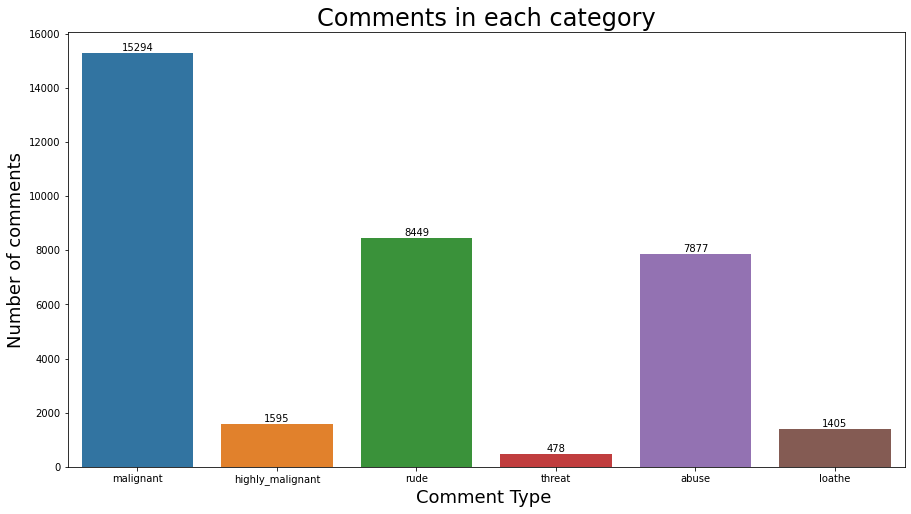

In [12]:
sum_labels = df_train.iloc[:,2:].sum(axis = 0)
plt.figure(figsize = (15,8))
plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
ax= sns.barplot(sum_labels.keys(), sum_labels)

for j in ax.containers:
        ax.bar_label(j)


#### 1.4 Checking cleaned comments

In [13]:
rowsums = df_train.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowsums==0).sum()

print("Total number of comments = ",len(df_train))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(df_train)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [14]:
df_train.iloc[:,2:].head()

malignant  highly_malignant  rude  threat  abuse  loathe
0          0                 0     0       0      0       0
1          0                 0     0       0      0       0
2          0                 0     0       0      0       0
3          0                 0     0       0      0       0
4          0                 0     0       0      0       0

In [15]:
rowSums = df_train.iloc[:,2:].sum(axis=1)

In [16]:
multiLabel_counts = rowSums.value_counts()
multiLabel_counts[1:]

1    6360
3    4209
2    3480
4    1760
5     385
6      31
dtype: int64

#### 1.4 Checking multiple labels counts

Text(0.5, 0, 'Number of labels')

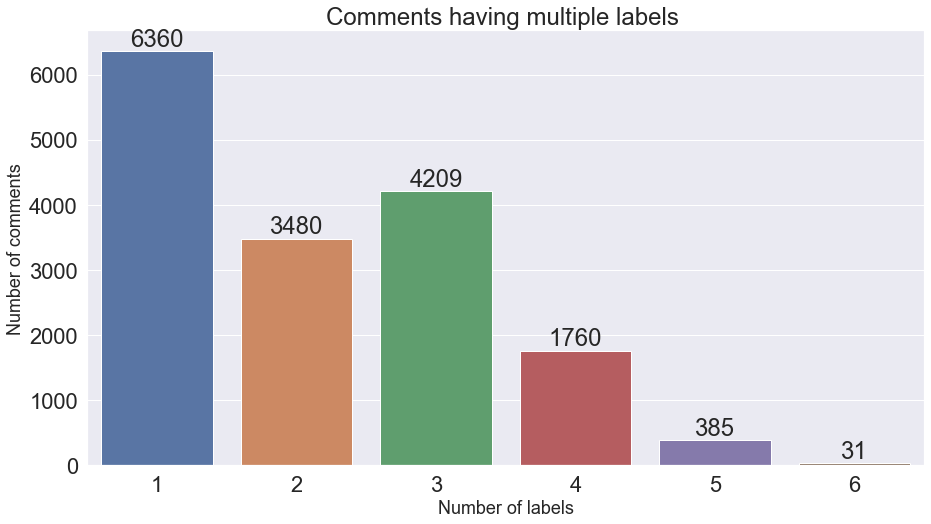

In [17]:
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

for j in ax.containers:
        ax.bar_label(j)


plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)


### 2. Data Cleaning

#### 2.1 Removing unwanted columns

In [7]:
df_train.drop("id", axis = 1, inplace = True)
df_test.drop("id", axis = 1, inplace = True) # dropping id due to its having all unique values

In [19]:
df_train.keys()

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

#### 2.2 Checking for duplicated values

In [20]:
df_train.duplicated().sum(), df_test.duplicated().sum()

(0, 0)

### 3. Data Preprocessing

In [8]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"’", "'", phrase)
    phrase = re.sub(r"“", """, phrase)
    phrase = re.sub(r"“", """, phrase)
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase

In [9]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


3.1 Training Dataset

In [10]:
from tqdm import tqdm
preprocessed_comments = []

#tqdm is for printing the status bar
for sentence in tqdm(df_train['comment_text'].values):
    sentence = decontracted(sentence)
    sentence = re.sub(r'^https?:\/\/.*[\r\n]*', '', sentence) # remove hyperlinks
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence) # removing special characters
    sentence = ''.join([i for i in sentence if not i.isdigit()]) # removing numbers
    sentence = ' '.join(e for e in sentence.split() if e not in stop_words) # removing stop words
    sentence = ' '.join(lemmatizer.lemmatize(e) for e in sentence.split()) # Lemmatization
    preprocessed_comments.append(sentence.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 159571/159571 [01:24<00:00, 1896.73it/s]


In [11]:
df_train['preprocessed_comments'] = preprocessed_comments

3.2 Test Dataset

In [12]:
from tqdm import tqdm
pre_test_comments = []

#tqdm is for printing the status bar
for sentence in tqdm(df_test['comment_text'].values):
    sentence = decontracted(sentence)
    sentence = re.sub(r'^https?:\/\/.*[\r\n]*', '', sentence) # remove hyperlinks
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence) # removing special characters
    sentence = ''.join([i for i in sentence if not i.isdigit()]) # removing numbers
    sentence = ' '.join(e for e in sentence.split() if e not in stop_words) # removing stop words
    sentence = ' '.join(lemmatizer.lemmatize(e) for e in sentence.split()) # Lemmatization
    pre_test_comments.append(sentence.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 153164/153164 [01:05<00:00, 2340.21it/s]


In [20]:
pre_test_comments[:5]

['yo bitch ja rule succesful ever whats hating sad mofuckas bitch slap ur pethedic white face get kiss as guy sicken ja rule pride da music man dont dis shit nothin wrong bein like tupac brother fuckin white boy get thing right next time',
 'from rfc the title fine imo',
 'sources zawe ashton lapland',
 'if look back source information i updated correct form i guess source updated i shall update information thank message',
 'i anonymously edit article']

In [21]:
df_test['pre_test_comments'] = pre_test_comments

In [22]:
df_train.sample(10)

comment_text  malignant  \
117751        See also: Using the python wikipediabot.  —          0   
136829  Sorry I must have forgot. Kevin Kahle Kevin Kahle          0   
6481    "\n\n Nutball5000 \n\n  Well, can you watch bo...          0   
138932  Well, it was deliberate vandalism so you don't...          0   
24438   October 2009 \n Please stop your disruptive ed...          0   
61012   Adoption\nI saw your name on the adopters list...          0   
32817   Hi  guys, It's admirable that  students take o...          0   
83027   As an example, consider f(x)=|x|, in the New c...          0   
77927   "\nYes, because ""images of the car"" is entir...          0   
137041  "\n\n Please do not vandalize pages, as you di...          0   

        highly_malignant  rude  threat  abuse  loathe  \
117751                 0     0       0      0       0   
136829                 0     0       0      0       0   
6481                   0     0       0      0       0   
138932                 0     0       0      0       0   
24438                  0     0       0      0       0   
61012                  0     0       0      0       0   
32817                  0     0       0      0       0   
83027                  0     0       0      0       0   
77927                  0     0       0      0       0   
137041                 0     0       0      0       0   

                                    preprocessed_comments  length  
117751                 see also using python wikipediabot      34  
136829          sorry must forgot kevin kahle kevin kahle      41  
6481              nutball well watch movie write synopsis      39  
138932  well deliberate vandalism kind jeff deserved w...      58  
24438   october please stop disruptive editing continu...     178  
61012   adoption saw name adopter list wondering still...      67  
32817   hi guy admirable student take task writing wik...     300  
83027   example consider f x x new calculus make sense...      86  
77927   yes image car entirely relevant discussion com...      59  
137041  please vandalize page edit scarlet macaw conti...      65

from above result we found that "i" words comes in middle of the cleaned comments hence we need to add again stopwords to remove this. 

In [23]:
stop_words = set(stopwords.words("english") + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure', "i"])

df_train['preprocessed_comments'] = df_train['preprocessed_comments'].apply(lambda x: " ".join(
                term for term in x.split() if term not in stop_words))

df_test['pre_test_comments'] = df_test['pre_test_comments'].apply(lambda x: " ".join(
                term for term in x.split() if term not in stop_words))


#### 3.3 Data Visualization

In [24]:
df_train['length'] = df_train['preprocessed_comments'].str.len()

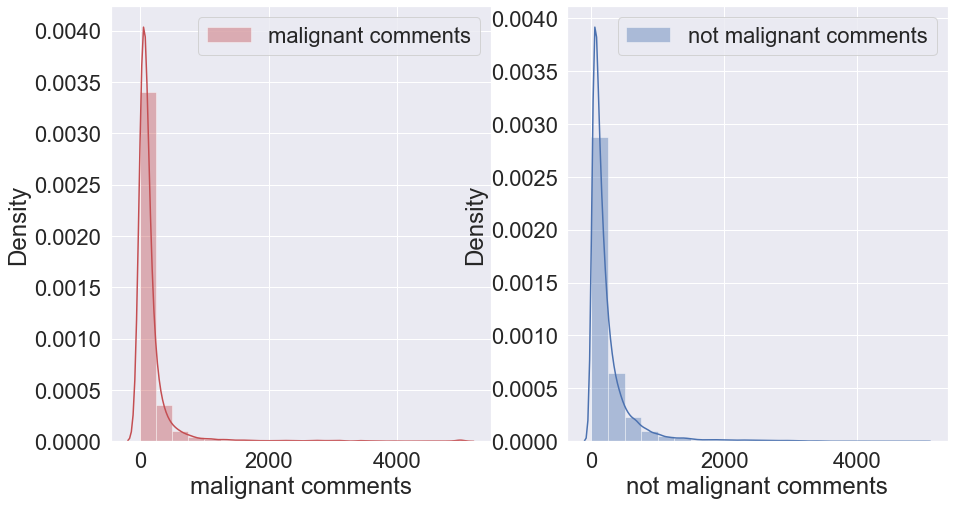

In [46]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df_train[df_train['malignant']==1]['length'],bins=20,ax=ax[0],label='malignant comments',color='r')

ax[0].set_xlabel('malignant comments')
ax[0].legend()

sns.distplot(df_train[df_train['malignant']==0]['length'],bins=20,ax=ax[1],label='not malignant comments')
ax[1].set_xlabel('not malignant comments')
ax[1].legend()

plt.show()


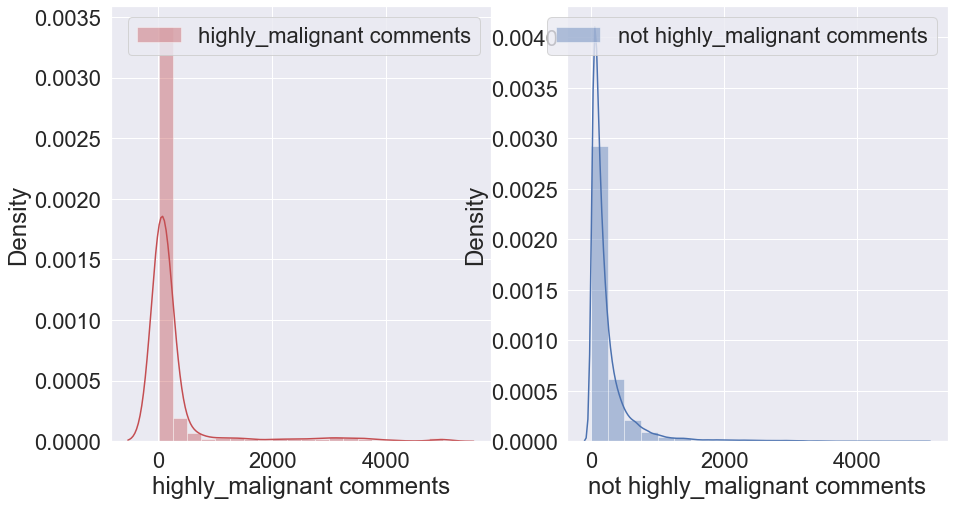

In [47]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df_train[df_train['highly_malignant']==1]['length'],bins=20,ax=ax[0],label='highly_malignant comments',color='r')

ax[0].set_xlabel('highly_malignant comments')
ax[0].legend()

sns.distplot(df_train[df_train['highly_malignant']==0]['length'],bins=20,ax=ax[1],label='not highly_malignant comments')
ax[1].set_xlabel('not highly_malignant comments')
ax[1].legend()

plt.show()


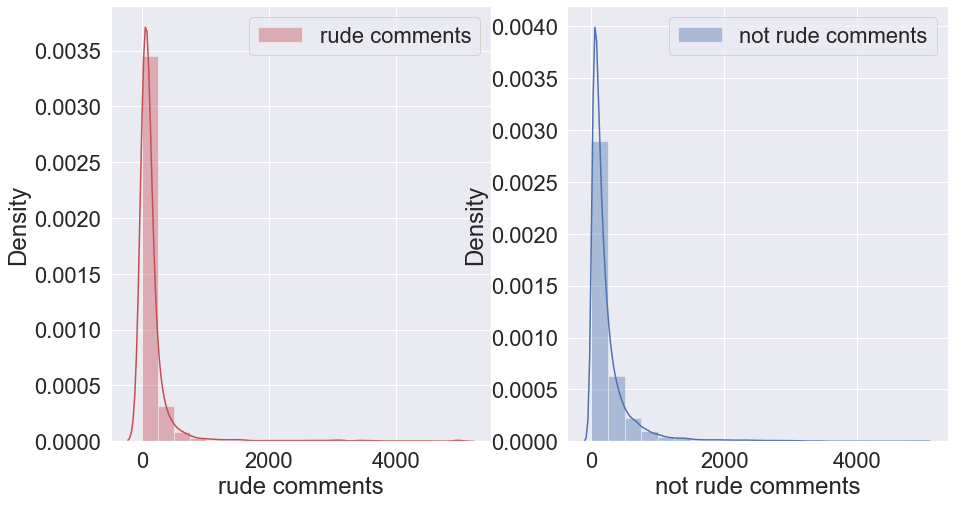

In [48]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df_train[df_train['rude']==1]['length'],bins=20,ax=ax[0],label='rude comments',color='r')

ax[0].set_xlabel('rude comments')
ax[0].legend()

sns.distplot(df_train[df_train['rude']==0]['length'],bins=20,ax=ax[1],label='not rude comments')
ax[1].set_xlabel('not rude comments')
ax[1].legend()

plt.show()


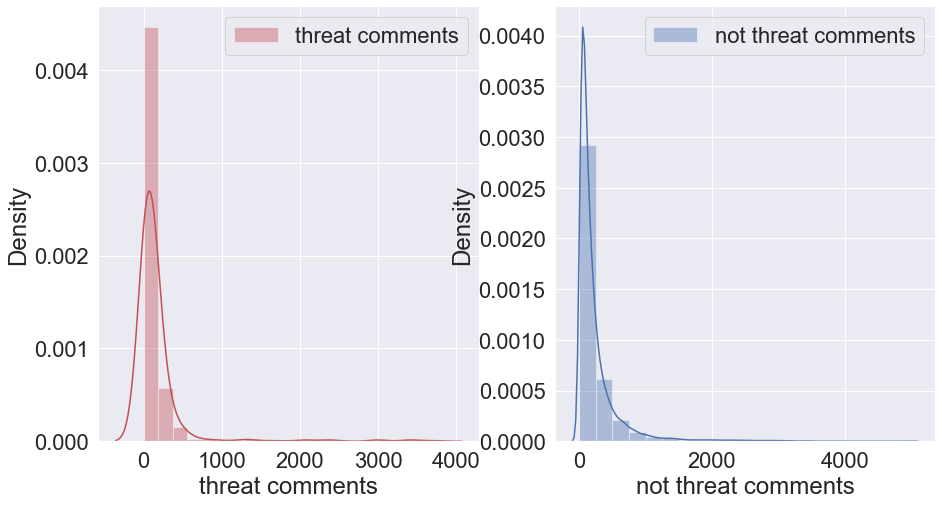

In [49]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df_train[df_train['threat']==1]['length'],bins=20,ax=ax[0],label='threat comments',color='r')

ax[0].set_xlabel('threat comments')
ax[0].legend()

sns.distplot(df_train[df_train['threat']==0]['length'],bins=20,ax=ax[1],label='not threat comments')
ax[1].set_xlabel('not threat comments')
ax[1].legend()

plt.show()


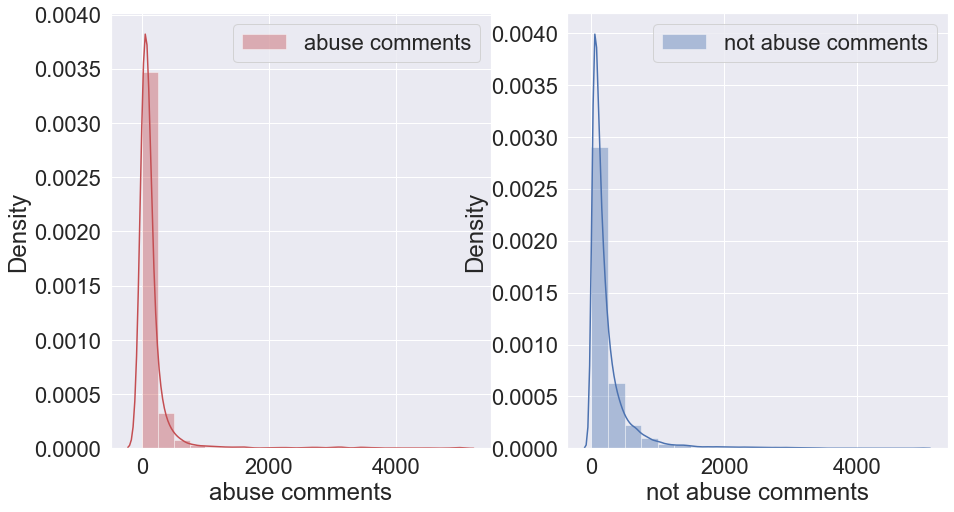

In [50]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df_train[df_train['abuse']==1]['length'],bins=20,ax=ax[0],label='abuse comments',color='r')

ax[0].set_xlabel('abuse comments')
ax[0].legend()

sns.distplot(df_train[df_train['abuse']==0]['length'],bins=20,ax=ax[1],label='not abuse comments')
ax[1].set_xlabel('not abuse comments')
ax[1].legend()

plt.show()


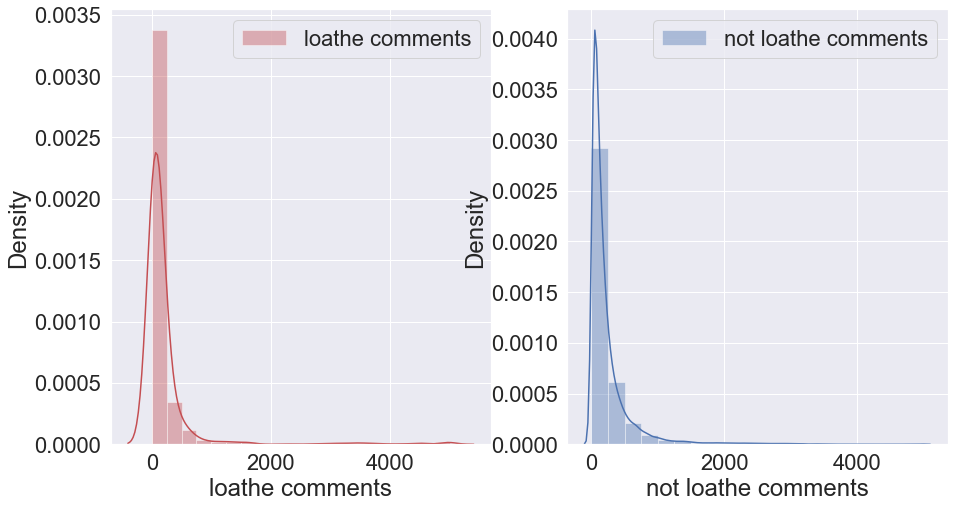

In [51]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df_train[df_train['loathe']==1]['length'],bins=20,ax=ax[0],label='loathe comments',color='r')

ax[0].set_xlabel('loathe comments')
ax[0].legend()

sns.distplot(df_train[df_train['loathe']==0]['length'],bins=20,ax=ax[1],label='not loathe comments')
ax[1].set_xlabel('not loathe comments')
ax[1].legend()

plt.show()


#### 3.4 Word Clouds

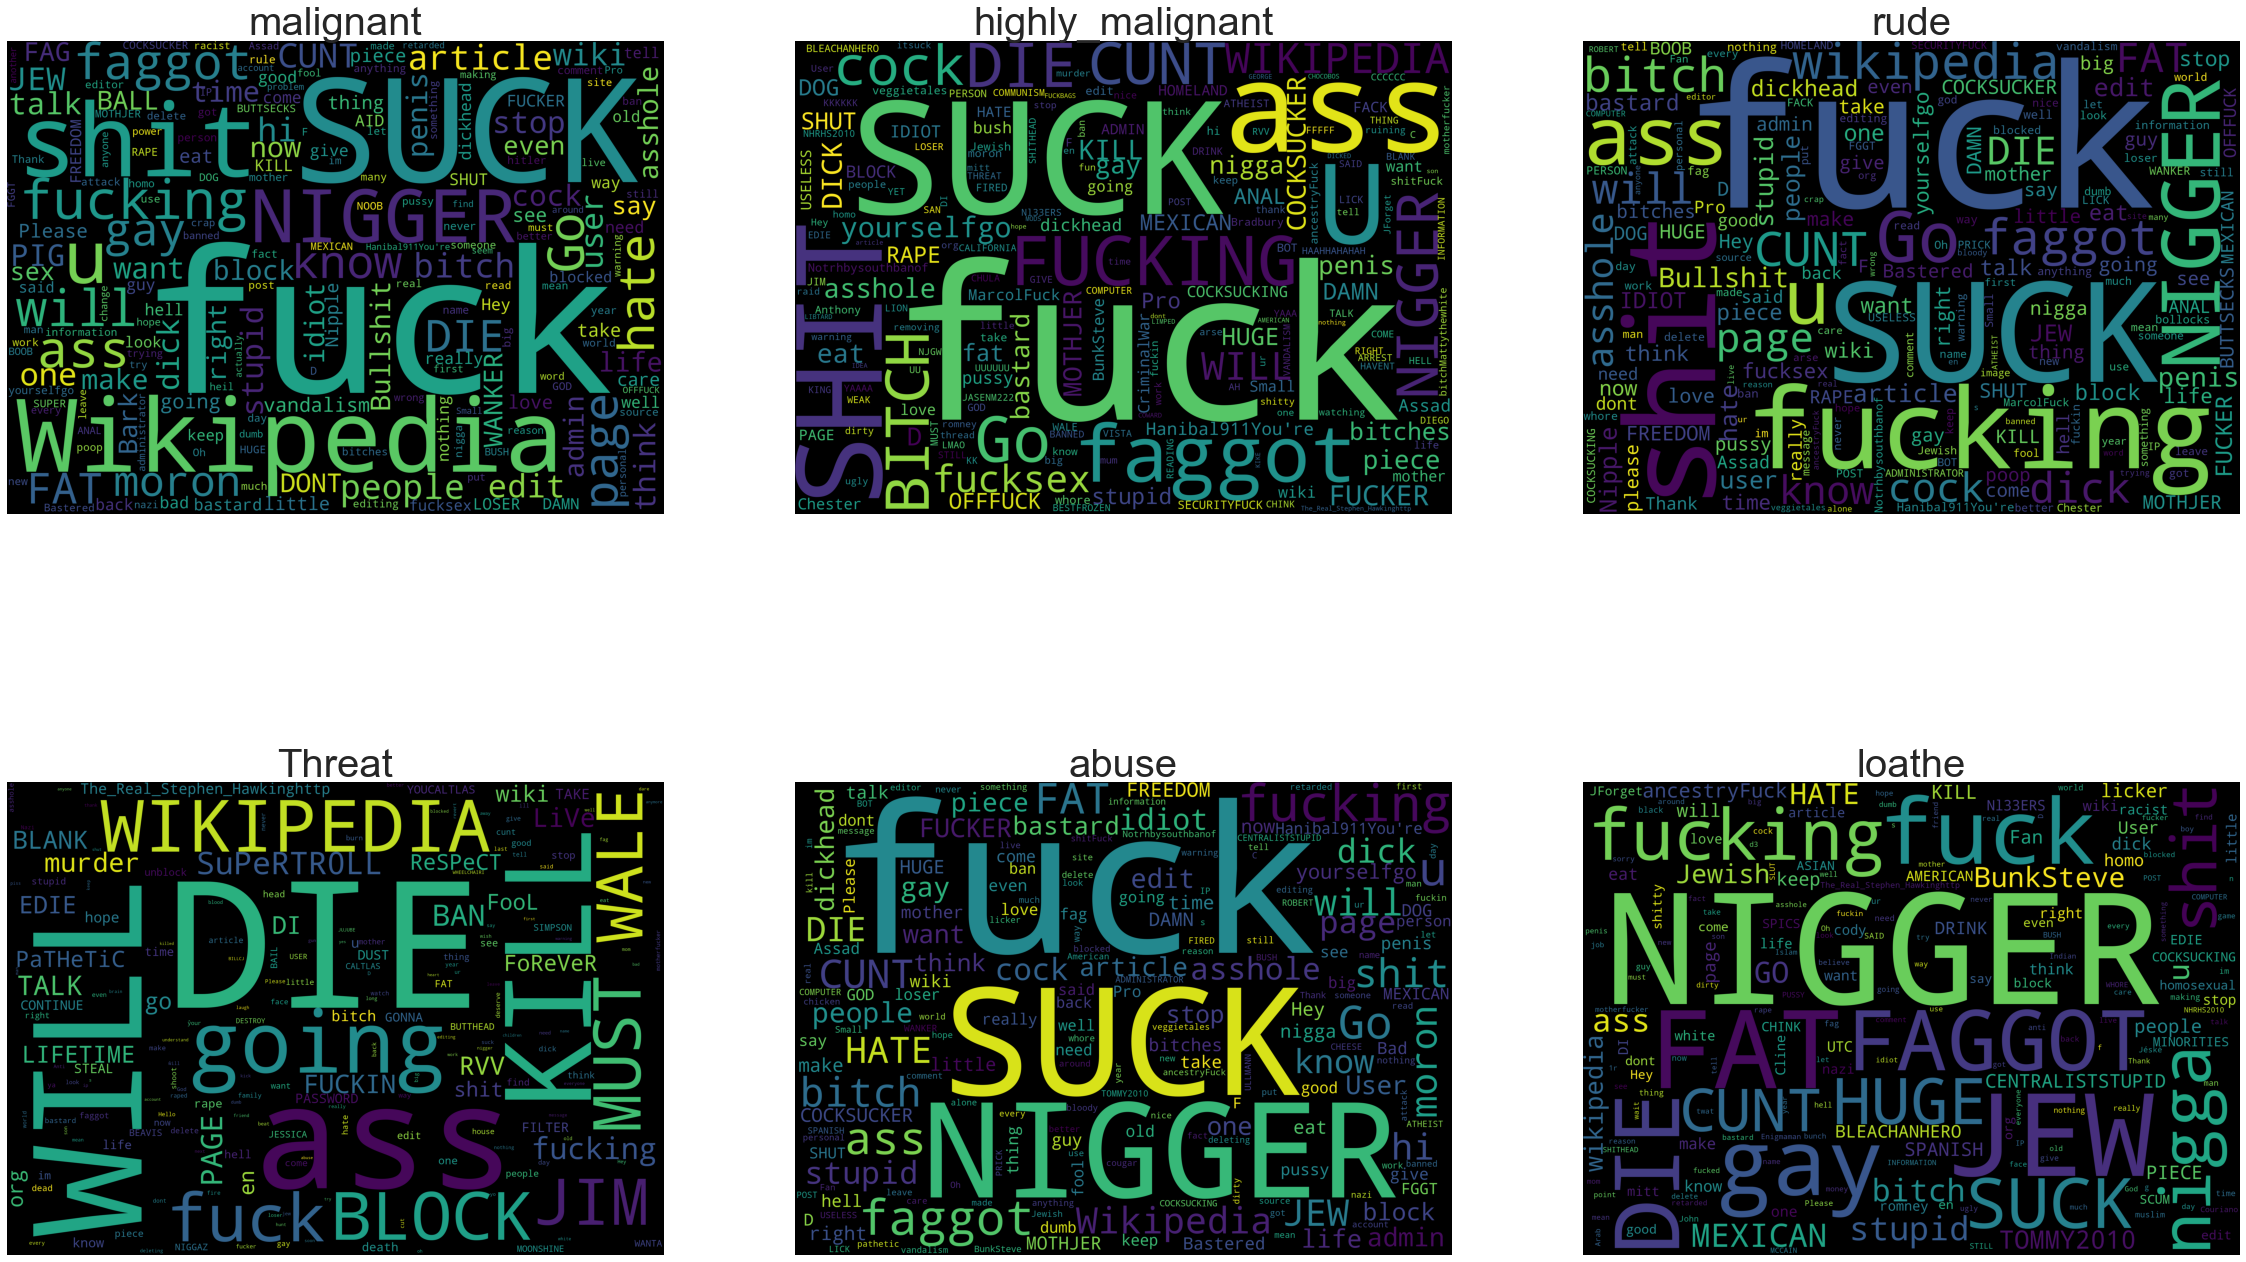

In [52]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# malignant
subset = df_train[df_train.malignant==1]
text = subset.comment_text.values
cloud_malignant = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("malignant",fontsize=40)
plt.imshow(cloud_malignant)


# cloud_highly_malignant
subset =df_train[df_train.highly_malignant==1]
text = subset.comment_text.values
cloud_highly_malignant = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("highly_malignant",fontsize=40)
plt.imshow(cloud_highly_malignant)


# rude
subset = df_train[df_train.rude==1]
text = subset.comment_text.values
cloud_rude = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("rude",fontsize=40)
plt.imshow(cloud_rude)


# threat
subset = df_train[df_train.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# abuse
subset = df_train[df_train.abuse==1]
text = subset.comment_text.values
cloud_abuse = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("abuse",fontsize=40)
plt.imshow(cloud_abuse)


# loathe
subset = df_train[df_train.loathe==1]
text = subset.comment_text.values
cloud_loathe = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("loathe",fontsize=40)
plt.imshow(cloud_loathe)

plt.show()

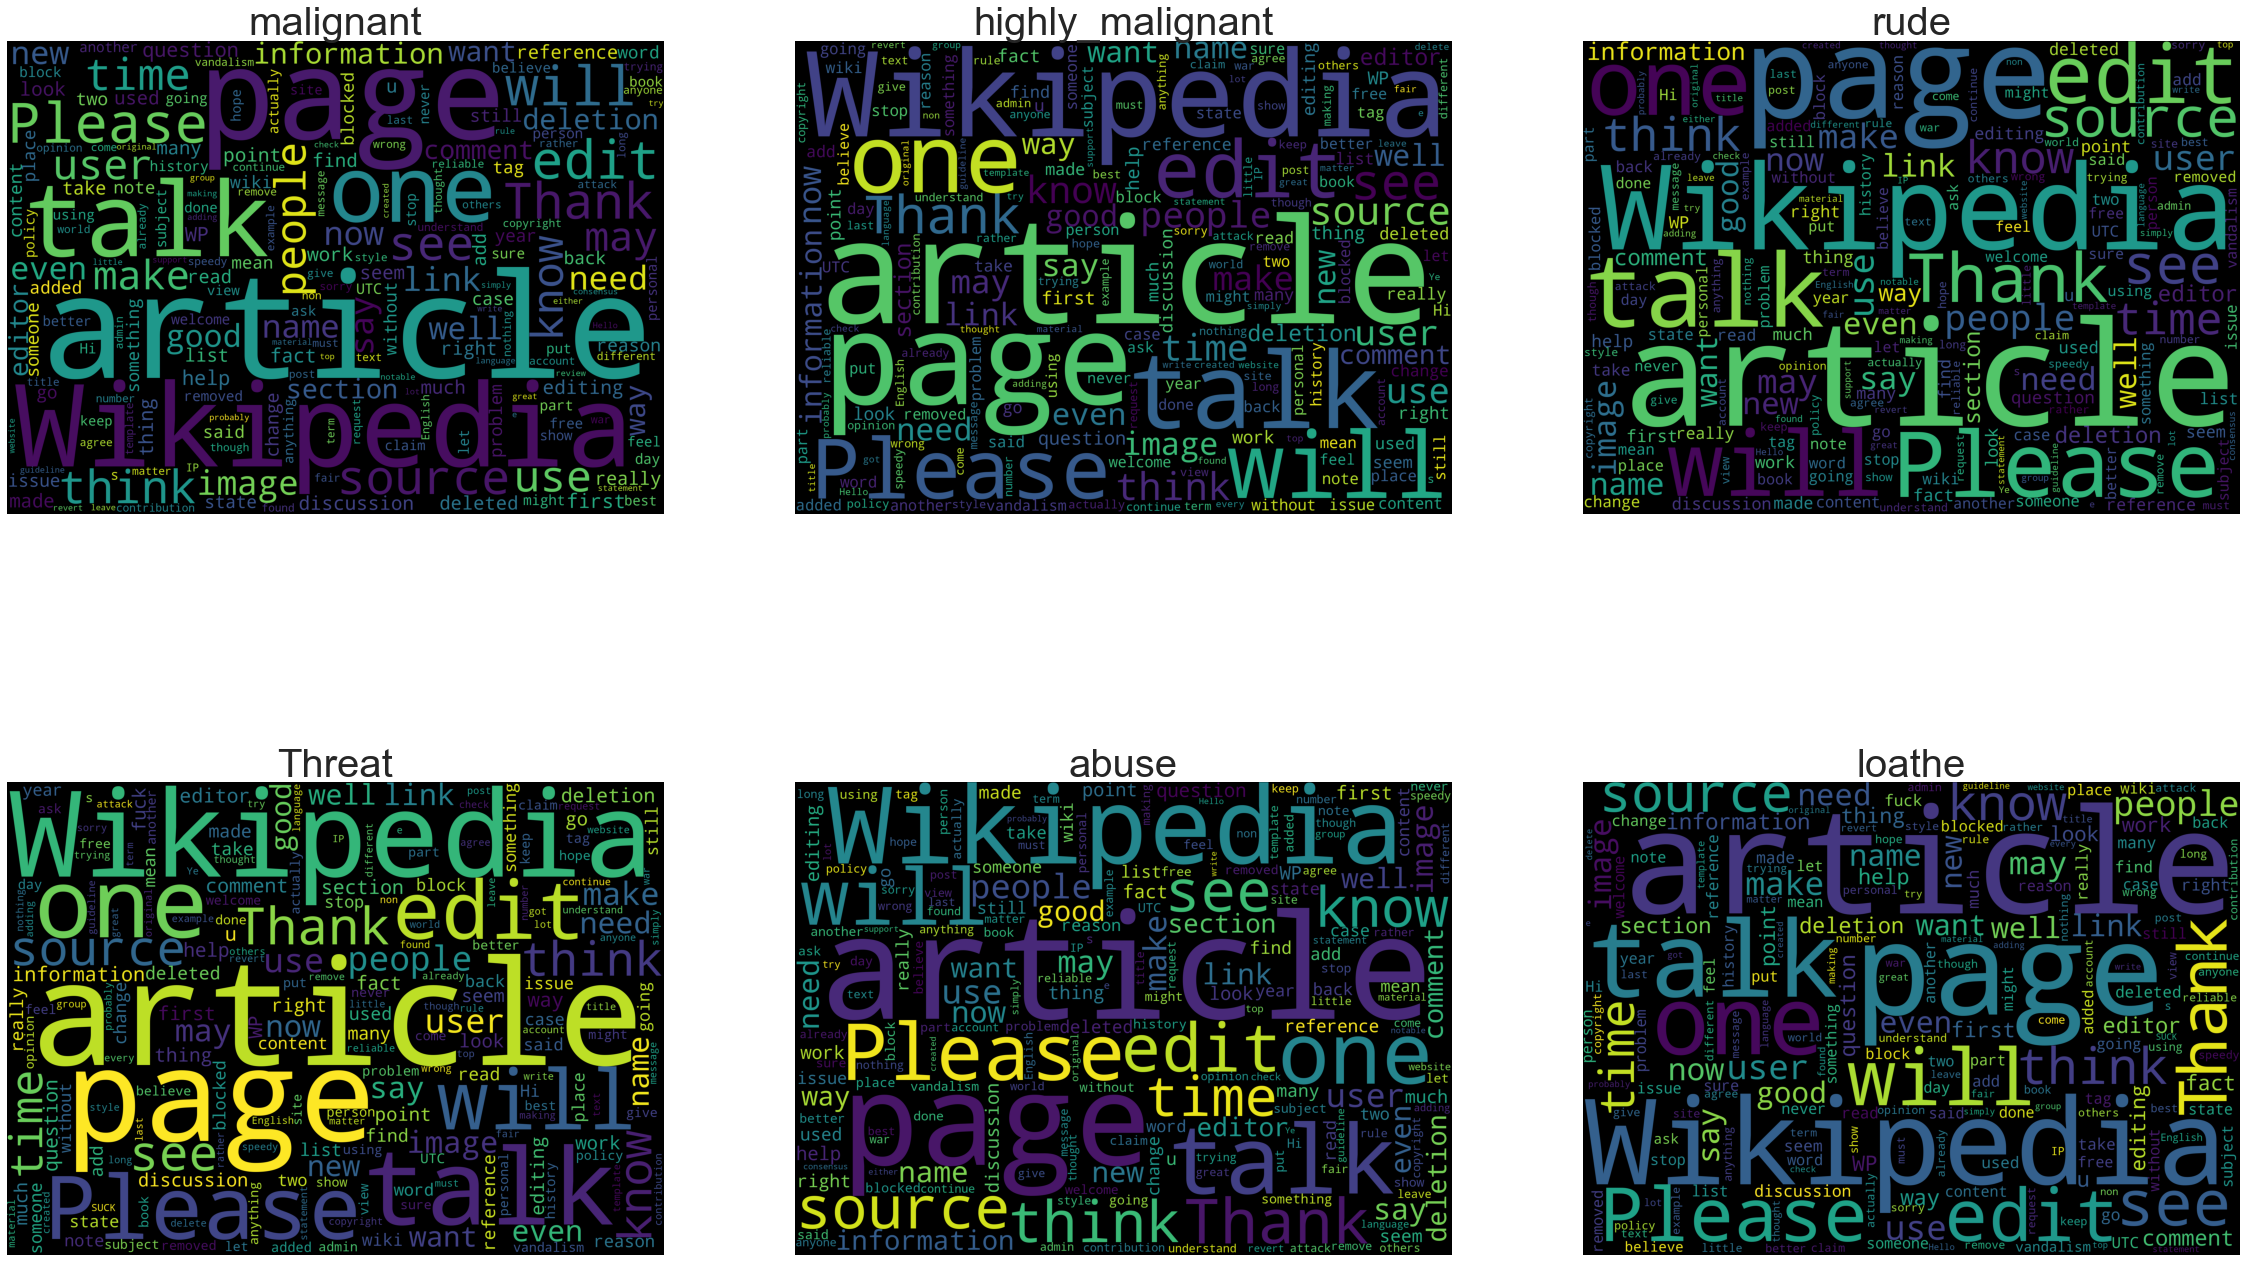

In [53]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# malignant
subset = df_train[df_train.malignant==0]
text = subset.comment_text.values
cloud_malignant = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("malignant",fontsize=40)
plt.imshow(cloud_malignant)


# cloud_highly_malignant
subset =df_train[df_train.highly_malignant==0]
text = subset.comment_text.values
cloud_highly_malignant = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("highly_malignant",fontsize=40)
plt.imshow(cloud_highly_malignant)


# rude
subset = df_train[df_train.rude==0]
text = subset.comment_text.values
cloud_rude = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("rude",fontsize=40)
plt.imshow(cloud_rude)


# threat
subset = df_train[df_train.threat==0]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# abuse
subset = df_train[df_train.abuse==0]
text = subset.comment_text.values
cloud_abuse = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("abuse",fontsize=40)
plt.imshow(cloud_abuse)


# loathe
subset = df_train[df_train.loathe==0]
text = subset.comment_text.values
cloud_loathe = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("loathe",fontsize=40)
plt.imshow(cloud_loathe)

plt.show()

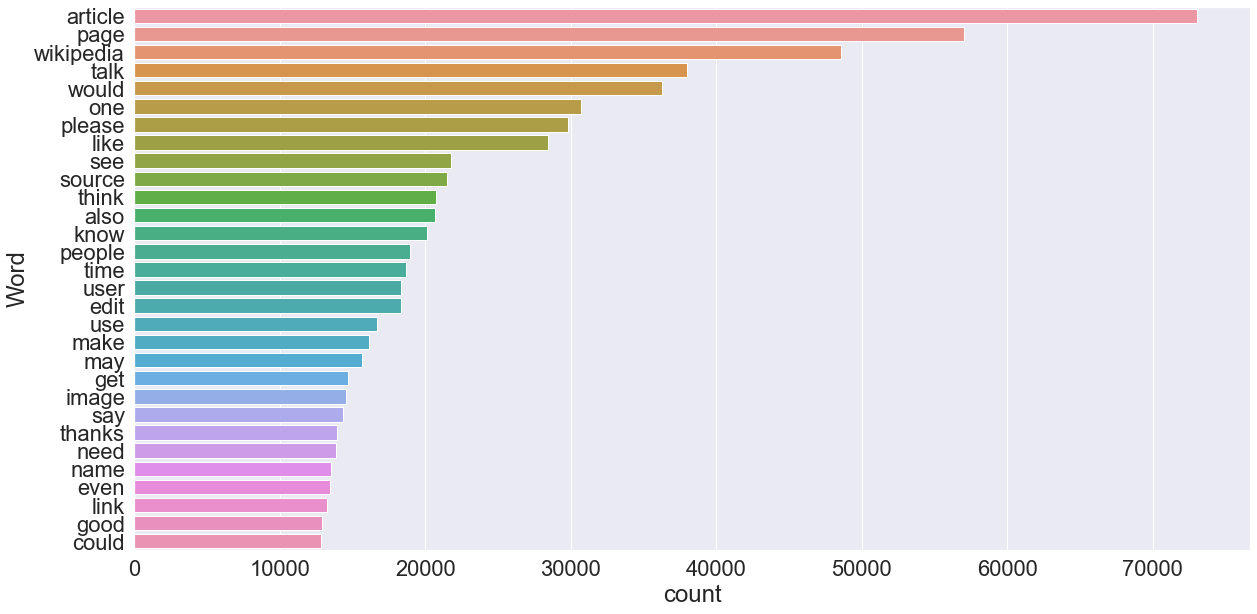

None


In [55]:
from nltk import FreqDist
def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting top 30 frequent words
    d=words_df.nlargest(columns='count',n=terms)
    plt.figure(figsize=(20,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df_train['preprocessed_comments']))


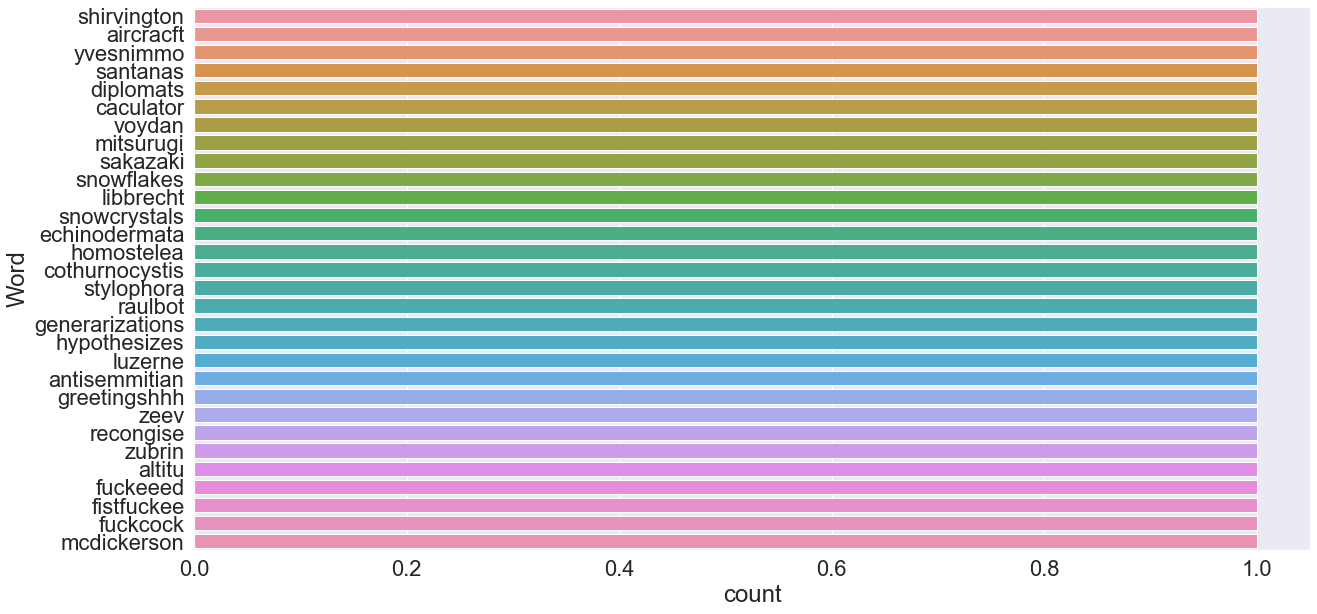

None


In [56]:
from nltk import FreqDist
def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting least 30 frequent words
    d=words_df.nsmallest(columns='count',n=terms)
    plt.figure(figsize=(20,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df_train['preprocessed_comments']))


### 4. Model Building

4.1 Taking necessary columns data for model building

In [72]:
x = df_train['preprocessed_comments']
y = df_train.drop(['comment_text', 'length', 'preprocessed_comments'], axis = 1)

In [97]:
#converting text to numerical through n-gram tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


word_vectorizer=TfidfVectorizer()

word_vectorizer.fit(x)
train_word_features=word_vectorizer.transform(x)

In [74]:
# #vectorizing into character level
# char_vectorizer=TfidfVectorizer(sublinear_tf=True,
#                               strip_accents='unicode',
#                               analyzer='char',
#                               stop_words='english',
#                               ngram_range=(2,6),
#                                max_features=10000000)

# char_vectorizer.fit(x)
# train_char_features=char_vectorizer.transform(x)

In [75]:
# #clubbing the word and the charachter vector
# from scipy.sparse import hstack
# train_features=hstack([train_char_features,train_word_features])

Headstack is a library which will horizontally club the word and character matrix

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_word_features, y, test_size=0.25, random_state=9)

print(y_train.shape)
print(y_test.shape)

print(x_train.shape)
print(x_test.shape)

(119678, 6)
(39893, 6)
(119678, 165384)
(39893, 165384)


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix
from sklearn.metrics import multilabel_confusion_matrix, f1_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
naive = MultinomialNB()


#### 4.2 Models

Multinomail NB

In [79]:
model = OneVsRestClassifier(MultinomialNB()).fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score',accuracy_score(y_pred, y_test))
print('Classification Report: \n', classification_report(y_pred, y_test) )
print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,y_pred) )

Accuracy Score 0.8996565813551249
Classification Report: 
               precision    recall  f1-score   support

           0       0.17      0.99      0.30       672
           1       0.00      0.00      0.00         0
           2       0.10      0.98      0.18       208
           3       0.00      0.00      0.00         0
           4       0.04      0.96      0.07        77
           5       0.00      0.00      0.00         0

   micro avg       0.11      0.99      0.20       957
   macro avg       0.05      0.49      0.09       957
weighted avg       0.15      0.99      0.25       957
 samples avg       0.01      0.02      0.01       957

Confusion Matrix: 
 [[[36051     5]
  [ 3170   667]]

 [[39527     0]
  [  366     0]]

 [[37819     4]
  [ 1866   204]]

 [[39788     0]
  [  105     0]]

 [[37946     3]
  [ 1870    74]]

 [[39573     0]
  [  320     0]]]


#### DecisionTreeClassifier

In [31]:
# model = OneVsRestClassifier(DecisionTreeClassifier()).fit(x_train,y_train)
# y_pred = model.predict(x_test)
# print('Accuracy Score',accuracy_score(y_pred, y_test))
# print('Classification Report: \n', classification_report(y_pred, y_test) )
# print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,y_pred) )

#### LogisticRegression

In [80]:
model = OneVsRestClassifier(LogisticRegression()).fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score',accuracy_score(y_pred, y_test))
print('Classification Report: \n', classification_report(y_pred, y_test) )
print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,y_pred) )

Accuracy Score 0.9175043240668789
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.92      0.70      2369
           1       0.20      0.58      0.29       125
           2       0.60      0.91      0.72      1359
           3       0.09      0.56      0.15        16
           4       0.47      0.82      0.60      1123
           5       0.15      0.64      0.25        76

   micro avg       0.52      0.88      0.65      5068
   macro avg       0.35      0.74      0.45      5068
weighted avg       0.54      0.88      0.67      5068
 samples avg       0.04      0.05      0.05      5068

Confusion Matrix: 
 [[[35863   193]
  [ 1661  2176]]

 [[39474    53]
  [  294    72]]

 [[37699   124]
  [  835  1235]]

 [[39781     7]
  [   96     9]]

 [[37744   205]
  [ 1026   918]]

 [[39546    27]
  [  271    49]]]


#### Boosting Classifier RandomForestClassifier

In [81]:
# model = OneVsRestClassifier(RandomForestClassifier()).fit(x_train,y_train)
# y_pred = model.predict(x_test)
# print('Accuracy Score',accuracy_score(y_pred, y_test))
# print('Classification Report: \n', classification_report(y_pred, y_test) )
# print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,y_pred) )

#### 4.2 Checking with Label Powerset

In [82]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset


In [83]:
# # initialize label powerset multi-label classifier
# model = LabelPowerset(LogisticRegression()).fit(x_train,y_train)

# y_pred = model.predict(x_test)
# print('Accuracy Score',accuracy_score(y_pred, y_test))
# print('Classification Report: \n', classification_report(y_pred, y_test) )
# print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,y_pred) )

#### 4.3 Checking with Adapted Algorithm

In [84]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix


In [85]:
# classifier_new = MLkNN(k=10)

# # Note that this classifier can throw up errors when handling sparse matrices.

# x_train = lil_matrix(x_train).toarray()
# y_train = lil_matrix(y_train).toarray()
# x_test = lil_matrix(x_test).toarray()

# # train
# model.fit(x_train, y_train)

# # predict
# y_pred = classifier_new.predict(x_test)

# # accuracy
# print("Accuracy of Adapted Algorithm= ",accuracy_score(y_pred, y_test))
# print("\n")

#### Hyper Parameter Tuning is applied to Logistic Regression model as it is giving best accuracy in all used ML algorithms

In [86]:
params ={"estimator__penalty":["l2","none"],
          "estimator__fit_intercept":[True,False],
          "estimator__solver":["newton-cg","lbfgs","liblinear","sag","saga"]}


In [88]:
model_tunning = GridSearchCV(estimator = model_to_set, param_grid=params, cv = 3)
model_tunning.fit(x_train, y_train)
model_tunning.best_params_

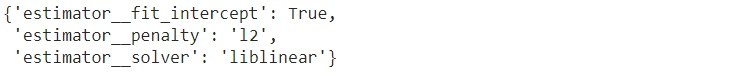

### Tuning with Parameters

In [89]:
model = LogisticRegression(fit_intercept = 'True', penalty = 'l2', solver = 'liblinear')
final_model = OneVsRestClassifier(model).fit(x_train, y_train)  
prediction = final_model.predict(x_test)
prediction2 = final_model.predict(x_train)
print('Accuracy of Testing ',accuracy_score(prediction, y_test))
print('Accuracy of Training ',accuracy_score(prediction2, y_train))
print('Classification Report: \n', classification_report(prediction, y_test) )
print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,prediction) )

Accuracy of Testing  0.9175043240668789
Accuracy of Training  0.9240879693845151
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.92      0.70      2369
           1       0.20      0.58      0.29       125
           2       0.60      0.91      0.72      1359
           3       0.09      0.56      0.15        16
           4       0.47      0.82      0.60      1123
           5       0.15      0.64      0.25        76

   micro avg       0.52      0.88      0.65      5068
   macro avg       0.35      0.74      0.45      5068
weighted avg       0.54      0.88      0.67      5068
 samples avg       0.04      0.05      0.05      5068

Confusion Matrix: 
 [[[35863   193]
  [ 1661  2176]]

 [[39474    53]
  [  294    72]]

 [[37699   124]
  [  835  1235]]

 [[39781     7]
  [   96     9]]

 [[37744   205]
  [ 1026   918]]

 [[39546    27]
  [  271    49]]]


### 4.4  Deploying the model

In [90]:
import pickle
filename = 'comment_project.pkl'                 # model name 
pickle.dump(final_model, open(filename, 'wb'))         # operation to deploy model

#### 4.5 Loading model

In [91]:
load_model =  pickle.load(open('comment_project.pkl', 'rb'))    # loading deployed model
result = load_model.score(x_test, y_test)                            
print(result)

0.9175043240668789


#### 4.6 Conclusion

In [92]:
original = np.array(y_test)
predicted = np.array(load_model.predict(x_test))  
# convert columns in to np.array

#### 5. For Test data

In [93]:
x_test = df_test['pre_test_comments']

In [98]:
#converting text to numerical through n-gram tfidf vectorizer
train_word_features_test=word_vectorizer.transform(x_test)

In [99]:
train_word_features_test.shape, train_word_features.shape

((153164, 165384), (159571, 165384))

In [100]:
pred_for_test = np.array(load_model.predict(train_word_features_test))

In [101]:
pred_for_test

array([[1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0]])

In [102]:
malignant = []
highly_malignant = []
rude = []
threat = []
abuse = []
loathe = []

for i in range(pred_for_test.shape[0]):
    malignant.append(pred_for_test[i][0])
    highly_malignant.append(pred_for_test[i][1])
    rude.append(pred_for_test[i][2])
    threat.append(pred_for_test[i][3])
    abuse.append(pred_for_test[i][4])
    loathe.append(pred_for_test[i][5])

print(len(malignant))
print(len(highly_malignant))
print(len(rude))
print(len(threat))
print(len(abuse))
print(len(loathe))


153164
153164
153164
153164
153164
153164


In [103]:
df_test['malignant'] = malignant
df_test['highly_malignant'] = highly_malignant
df_test['rude'] = rude
df_test['threat'] = threat
df_test['abuse'] = abuse
df_test['loathe'] = loathe

In [104]:
df_test.head()

comment_text  \
0  Yo bitch Ja Rule is more succesful then you'll...   
1  == From RfC == \n\n The title is fine as it is...   
2  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3  :If you have a look back at the source, the in...   
4          I don't anonymously edit articles at all.   

                                   pre_test_comments  malignant  \
0  yo bitch ja rule succesful ever whats hating s...          1   
1                                 rfc title fine imo          0   
2                        sources zawe ashton lapland          0   
3  look back source information updated correct f...          0   
4                           anonymously edit article          0   

   highly_malignant  rude  threat  abuse  loathe  
0                 0     1       0      1       0  
1                 0     0       0      0       0  
2                 0     0       0      0       0  
3                 0     0       0      0       0  
4                 0     0       0      0       0

In [105]:
df_test.to_csv("test.csv")